### 폰트 설정 (한글 깨짐 방지)

In [ ]:
# 경로 확인
print(mpl.__version__)
print(mpl.__file__)
print(mpl.get_configdir())
print(mpl.get_cachedir())

3.2.2
/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py
/root/.config/matplotlib
/root/.cache/matplotlib


In [ ]:
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

# 실행하고 런타임 다시 실행 할 것 !!!!!

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


INFO:matplotlib.font_manager:generated new fontManager


## 1. 코로나 데이터 읽기

In [ ]:
데이터파일: covid19_data 폴더 (통계청자료)
    (아래 경로는 코랩 기준)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# 구글 드라이브 파일 읽기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 코로나 데이터 각각 지역별, 성별, 나이별 파일 읽기
covid_area = pd.read_csv('/content/drive/My Drive/bigdata/Covid-19_korea_area.csv')
covid_sex = pd.read_csv('/content/drive/My Drive/bigdata/Covid-19_korea_sex.csv')
covid_age = pd.read_csv('/content/drive/My Drive/bigdata/Covid-19_korea_age.csv')

#### - 각 데이터 확인

In [ ]:
# 지역별 감염자 수
covid_area.head(3)

,about,4_infection,4_dead,5_infection,5_dead,6_infection,6_dead,7_infection,7_dead,8_infection,8_dead,9_infection,9_dead,10_infection,10_dead,11_infection,11_dead,infection_all,dead_all
0,seoul,183,2,228,2,452,3,288,4,2267,12,1424,33,719,22,2794,15,8355,93
1,busan,18,0,10,0,7,0,17,0,130,0,120,1,171,4,217,8,690,13
2,daegu,168,58,31,13,23,4,36,2,107,0,85,3,42,2,58,3,550,85


In [ ]:
# 성별별 감염자 수
covid_sex.head(3)

,about,4_infection,4_dead,5_infection,5_dead,6_infection,6_dead,7_infection,7_dead,8_infection,8_dead,9_infection,9_dead,10_infection,10_dead,11_infection,11_dead,infection_all,dead_all
0,male,214,29,416,11,625,6,968,9,2562,12,1939,45,1320,30,3658,23,11702,165
1,female,220,26,244,10,564,3,537,10,3080,11,1926,44,1253,18,3398,30,11222,152
2,all,434,55,660,21,1189,9,1505,19,5642,23,3865,89,2573,48,7056,53,22924,317


In [ ]:
# 나이대 별 감염자 수
covid_age.head(3)

,about,4_infection,4_dead,5_infection,5_dead,6_infection,6_dead,7_infection,7_dead,8_infection,8_dead,9_infection,9_dead,10_infection,10_dead,11_infection,11_dead,infection_all,dead_all
0,0s,14,0,16,0,31,0,53,0,196,0,115,0,89,0,200,0,714,0
1,10s,46,0,62,0,48,0,74,0,363,0,134,0,114,0,426,0,1267,0
2,20s,133,0,214,0,171,0,258,0,700,0,393,0,354,0,907,0,3130,0


#### - 감염자 데이터만 추출

In [ ]:
# 감염자 데이터만 추출
area_infection = covid_area.loc[:, ['about','infection_all', '4_infection','5_infection','6_infection',
                                    '7_infection','8_infection','9_infection','10_infection','11_infection']]
sex_infection = covid_sex.loc[:, ['about','infection_all', '4_infection','5_infection','6_infection','7_infection','8_infection','9_infection','10_infection','11_infection']]
age_infection = covid_age.loc[:, ['about','infection_all', '4_infection','5_infection','6_infection','7_infection','8_infection','9_infection','10_infection','11_infection']]

##### 추출한 데이터 확인

In [ ]:
area_infection.head(3)

,about,infection_all,4_infection,5_infection,6_infection,7_infection,8_infection,9_infection,10_infection,11_infection
0,seoul,8355,183,228,452,288,2267,1424,719,2794
1,busan,690,18,10,7,17,130,120,171,217
2,daegu,550,168,31,23,36,107,85,42,58


In [ ]:
sex_infection.head(3)

,about,infection_all,4_infection,5_infection,6_infection,7_infection,8_infection,9_infection,10_infection,11_infection
0,male,11702,214,416,625,968,2562,1939,1320,3658
1,female,11222,220,244,564,537,3080,1926,1253,3398
2,all,22924,434,660,1189,1505,5642,3865,2573,7056


In [ ]:
age_infection.head(3)

,about,infection_all,4_infection,5_infection,6_infection,7_infection,8_infection,9_infection,10_infection,11_infection
0,0s,714,14,16,31,53,196,115,89,200
1,10s,1267,46,62,48,74,363,134,114,426
2,20s,3130,133,214,171,258,700,393,354,907


# 2. 그래프

In [ ]:
# 그래프 그리기
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt

#### 지역 분석


In [ ]:
# 확진자수 전체 값만 남기기 (17행: all / 열: 전체 감염자 수만)
area_infection_edit = area_infection.iloc[:17,:2].reset_index(drop=True)

In [ ]:
# 지역별 전체 확진자 수
area_infection_edit

,about,infection_all
0,seoul,8355
1,busan,690
2,daegu,550
3,incheon,1349
4,gwangju,676
5,daejeon,459
6,ulsan,159
7,saejong,54
8,gyeonggi,6808
9,gangwon,616


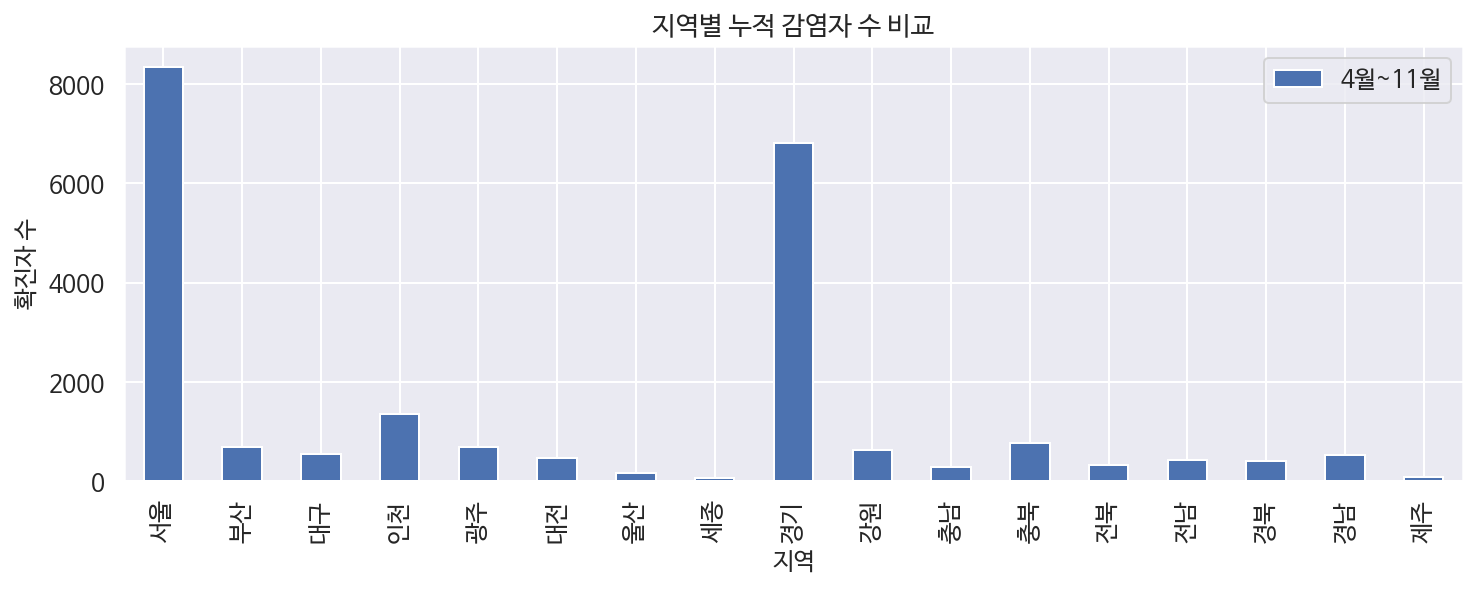

In [ ]:
ax = area_infection_edit.plot(kind='bar', title='지역별 누적 감염자 수 비교', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('지역', fontsize=12)          # x축 정보 표시
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], ['서울', '부산', '대구', '인천', '광주', '대전'
, '울산', '세종', '경기', '강원', '충남', '충북', '전북', '전남', '경북', '경남','제주'])
ax.set_ylabel('확진자 수', fontsize=12)     # y축 정보 표시
ax.legend(['4월~11월'], fontsize=12)    # 범례 지정

# 3. 코로나 확진자 예측 하기

페이스북의 prophet 시계열 예측 라이브러리 사용

In [ ]:
# 일별 누적 코로나 데이터 읽기
covid_date = pd.read_csv('/content/drive/My Drive/bigdata/Covid-19_date.csv')

In [ ]:
# 데이터 확인
covid_date.head()

,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,...,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01,2020-11-02,2020-11-03,2020-11-04,2020-11-05,2020-11-06,2020-11-07,2020-11-08,2020-11-09,2020-11-10,2020-11-11,2020-11-12,2020-11-13,2020-11-14,2020-11-15,2020-11-16,2020-11-17,2020-11-18,2020-11-19,2020-11-20,2020-11-21,2020-11-22,2020-11-23,2020-11-24,2020-11-25,2020-11-26,2020-11-27,2020-11-28,2020-11-29,2020-11-30,2020-12-01,2020-12-02,2020-12-03,2020-12-04,2020-12-05
0,0,0,0,0,18,19,23,24,24,27,27,28,28,28,28,28,29,30,31,51,104,204,433,602,833,977,1261,1766,2337,3150,3736,4212,4812,5328,5766,6284,6767,7134,7382,7513,...,26043,26146,26271,26385,26511,26635,26732,26807,26925,27050,27195,27284,27427,27553,27653,27799,27942,28133,28338,28546,28769,28998,29311,29654,30017,30403,30733,31004,31353,31735,32318,32887,33375,33824,34201,34652,35163,35703,36332,36915


In [ ]:
# prophet import
from fbprophet import Prophet

In [ ]:
# 데이터 행렬 변환 및 확인
data_prophet = covid_date.transpose()
data_prophet.head()

,0
2020-01-31,0
2020-02-01,0
2020-02-02,0
2020-02-03,0
2020-02-04,18


In [ ]:
# 컬럼값 입력
fb_data = data_prophet.reset_index()
fb_data.columns = ['ds','y']
fb_data

,ds,y
0,2020-01-31,0
1,2020-02-01,0
2,2020-02-02,0
3,2020-02-03,0
4,2020-02-04,18
...,...,...
305,2020-12-01,34652
306,2020-12-02,35163
307,2020-12-03,35703
308,2020-12-04,36332


In [ ]:
# Prophet 모델 사용
prophet = Prophet(growth='linear',
                  seasonality_mode='multiplicative',
                  yearly_seasonality=True, # year 트랜드
                  weekly_seasonality=True, # week 트랜드
                  daily_seasonality=True, # daily 트랜드
                  changepoint_range=0.6, # 데이터의 60% 정도에서 changepoint
                  changepoint_prior_scale=0.1) 
prophet.fit(fb_data)

In [ ]:
# 10일 간의 예측
future_data = prophet.make_future_dataframe(periods=10)
forecast_data = prophet.predict(future_data)

# yhat_lower:최저 yhat:평균 yhat_upper:최고
forecast_data[['ds', 'yhat_lower','yhat', 'yhat_upper']].tail(10)

,ds,yhat_lower,yhat,yhat_upper
310,2020-12-06,37369.022214,37436.243663,37505.513184
311,2020-12-07,37916.863068,37986.685396,38056.046976
312,2020-12-08,38496.512703,38573.251239,38641.491806
313,2020-12-09,39157.438274,39241.454052,39316.288999
314,2020-12-10,39884.213793,39976.469375,40064.380020
315,2020-12-11,40656.787435,40767.597648,40866.242138
316,2020-12-12,41472.172933,41598.130343,41710.380507
317,2020-12-13,42310.911512,42482.298355,42612.890289
318,2020-12-14,43177.635179,43407.414002,43581.539884
319,2020-12-15,44125.037336,44427.246389,44659.083965


In [ ]:
# Prophet 차트 사용 위한 import
from fbprophet.plot import add_changepoints_to_plot
import statsmodels.api as sm

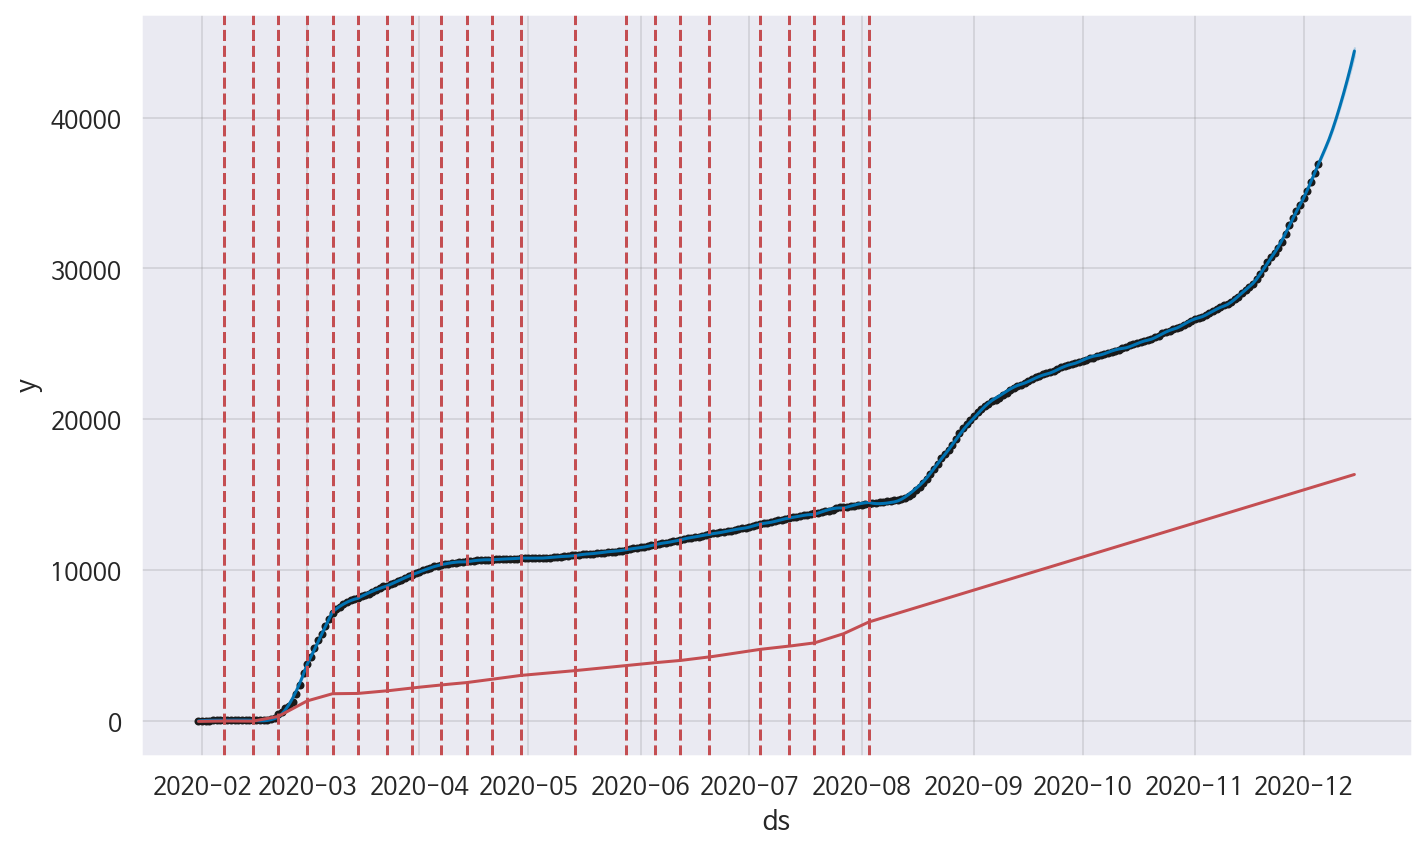

In [ ]:
fig = prophet.plot(forecast_data)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast_data)

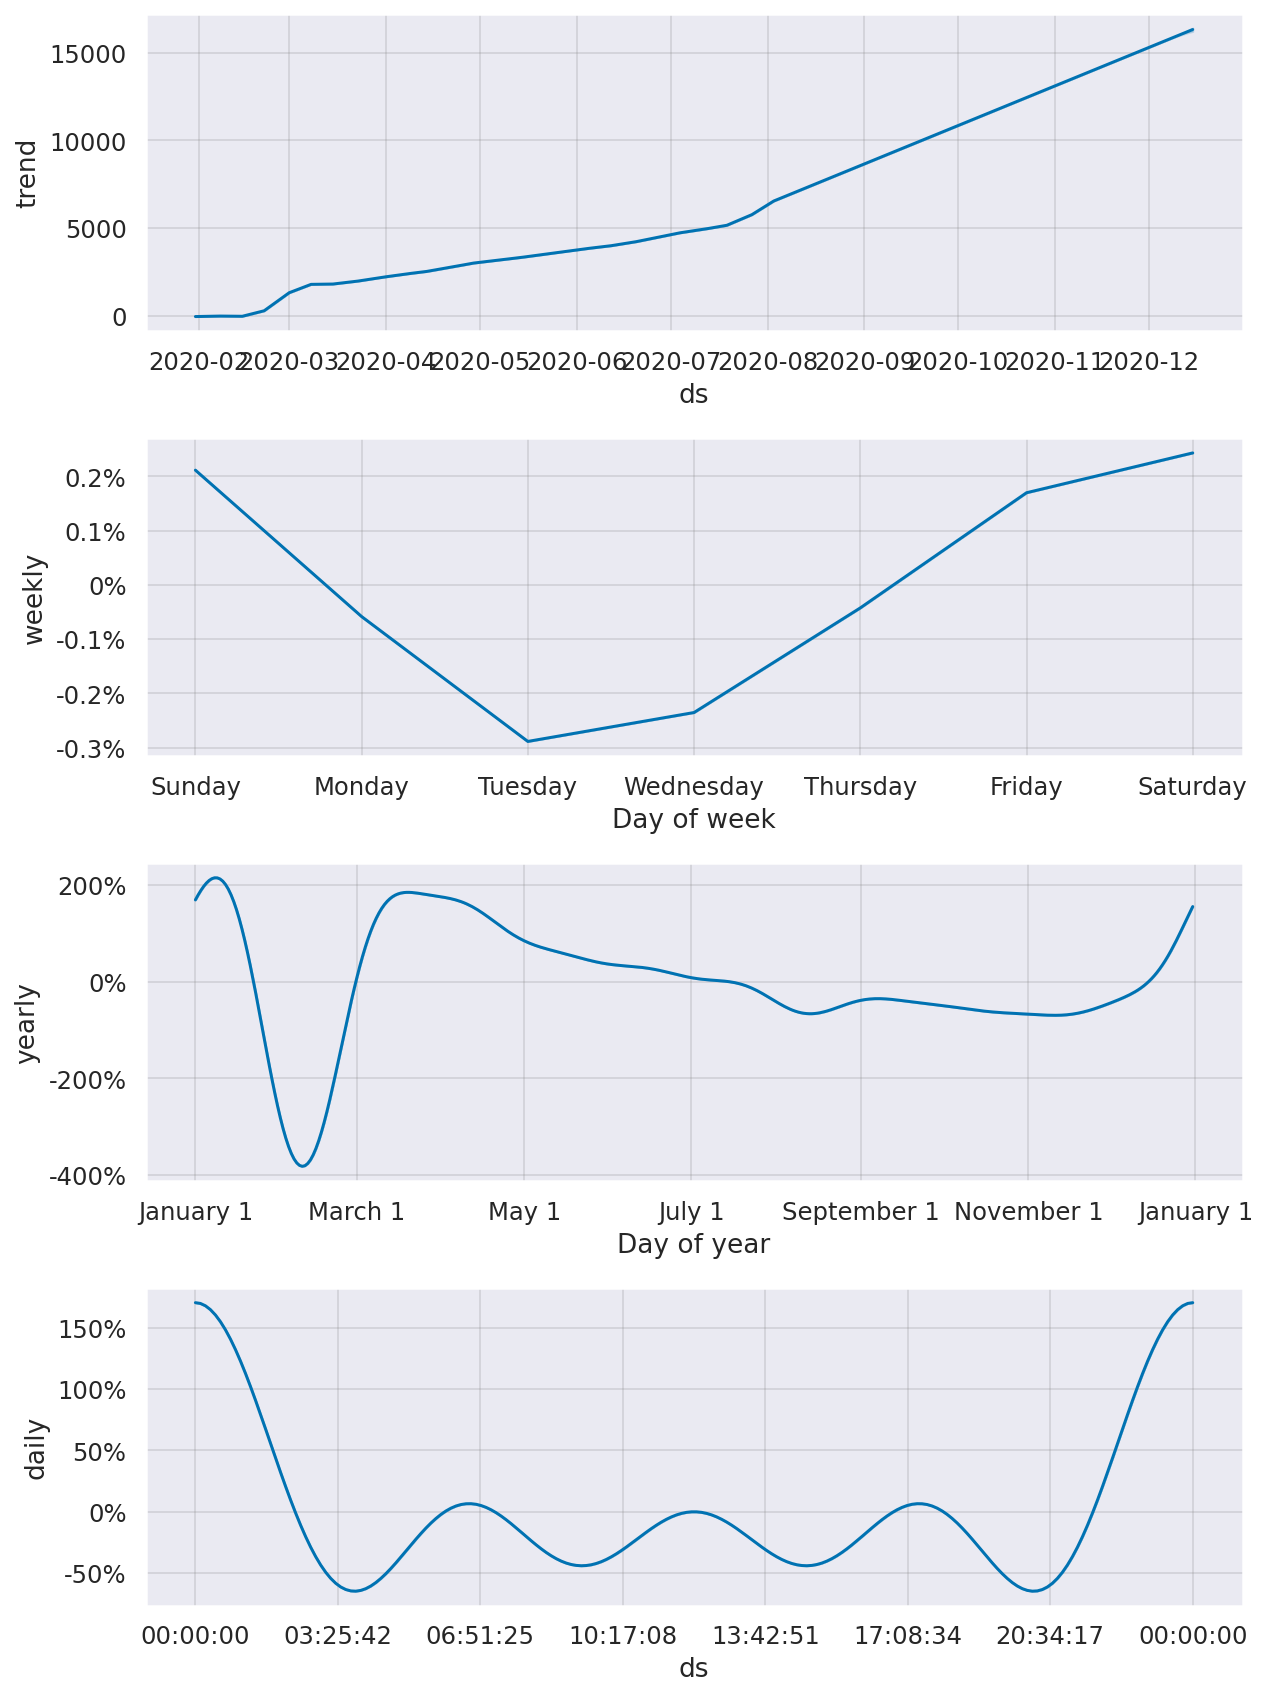

In [ ]:
sns.set(font_scale=1.1)
fig1 = prophet.plot_components(forecast_data)
plt.tight_layout()